In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Redes Neurais 2024/1 - Lista 2



## Questão 1

### Resposta Normal com média modelada por uma função logaritmica da covariável x.

$$ y \sim \mathcal{N}(\mu,\,\sigma^{2})\ $$

<br>

* $𝞵 = g(𝐗 \beta) $, onde $ g(x) = x $

<br>

Onde a matriz de covariáveis é:

* A i-ésima linha de X é igual a $ x_i = [1, ln(xi)] $  







### Resposta Binomial com probabilidade de sucesso modelada por um spline linear aplicado à covariável x com nós em {0.2, 1.3, 2, 3.2}.

$$ y \sim Bin(n,p)\ $$

<br>

* $ p = g(𝐗 \beta) $, onde $ g(x) = \frac{1}{1 + e^{-x}} $

<br>

Onde a matriz de covariáveis é:

* A i-ésima linha de X é igual a $ xi = [1, xi, (xi - 0.2)_{+}, (xi - 1.3)_{+}, (xi - 2)_{+}, (xi - 3.2)_{+}] $  


### Variável categórica (4 categorias) com as probabilidades de cada categoria modeladas por splines cúbicos com nós em {0, 1, 2}.

$$ y \sim Multinomial(1, p)\  $$ e $$ p = [p_1, p_2, p_3, p_4] $$

<br>

* $ p_i = g(𝐗 \beta_i) $, onde $ g(x) = \frac{ e^{𝐗 \beta_i} }{ \sum{e^{𝐗 \beta_i}} } $

<br>

Onde a matriz de covariáveis é:

* A i-ésima linha de X é igual a $ xi = [1, xi, xi^{2}, xi^{3}, (xi - 0)^{3}_{+}, (xi - 1)^{3}_{+}, (xi - 2)^{3}_{+}] $  


## Questão 2

Para acharmos $\sigma(w^{T}X + b) = 0.5 $ ⟹ $ w^{T}X + b = 0$

<br>

Dessa forma, temos:

a) $ 𝒘 = (1, 1)^{T} $, $ b = -1 $

$$ x_1 + x_2 - 1 = 0 $$


$$ x_2 = x_1 + 1 $$

<br>

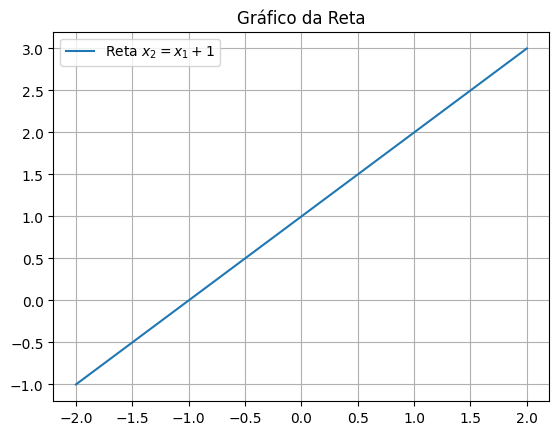

In [ ]:
eixo_x = np.linspace(-2, 2, num = 1000)
eixo_y = eixo_x + 1

plt.plot(eixo_x, eixo_y, label = 'Reta $x_2 = x_1 + 1$')
plt.title('Gráfico da Reta')
plt.legend()
plt.grid()
plt.show()




* Os pontos acima da reta satisfaz: $ w^{T}X + b > 0.5 $
* Os pontos na reta satisfaz: $ w^{T}X + b = 0.5 $
* Os pontos abaixo da reta satisfaz: $ w^{T}X + b < 0.5 $


b) $ 𝒘 = (0, 2)^{T} $, $ b = 1 $

$$ 2x_2 + 1 = 0 $$


$$ x_2 = -0.5 $$

<br>


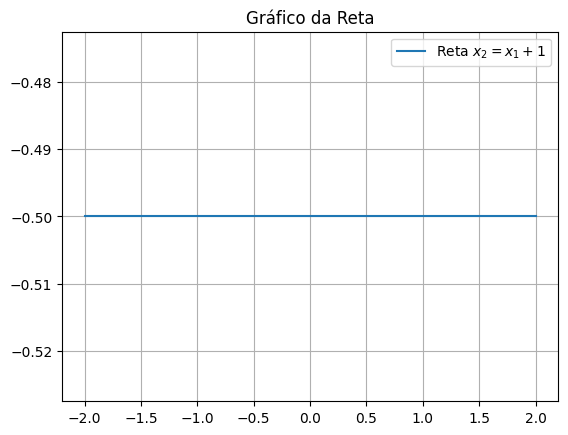

In [ ]:
eixo_x = np.linspace(-2, 2, num = 1000)
eixo_y = np.zeros(len(eixo_x))

for i,_ in enumerate(eixo_x):
  eixo_y[i] = -0.5


plt.plot(eixo_x, eixo_y, label = 'Reta $x_2 = x_1 + 1$')
plt.title('Gráfico da Reta')
plt.legend()
plt.grid()
plt.show()

* Os pontos acima da reta satisfaz: $ w^{T}X + b > 0.5 $
* Os pontos na reta satisfaz: $ w^{T}X + b = 0.5 $
* Os pontos abaixo da reta satisfaz: $ w^{T}X + b < 0.5 $


c) $ 𝒘 = (2, -1)^{T} $, $ b = -2 $

$$ 2x_1 -x_2 -2 = 0 $$


$$ x_2 = 2x_1 -2 $$

<br>


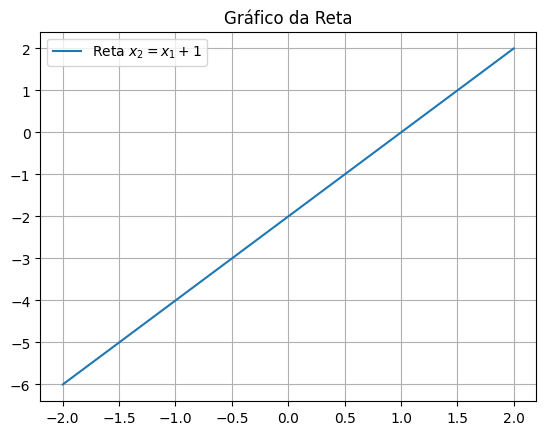

In [ ]:
eixo_x = np.linspace(-2, 2, num = 1000)
eixo_y = 2*eixo_x -2

plt.plot(eixo_x, eixo_y, label = 'Reta $x_2 = x_1 + 1$')
plt.title('Gráfico da Reta')
plt.legend()
plt.grid()
plt.show()

* Os pontos acima da reta satisfaz: $ w^{T}X + b > 0.5 $
* Os pontos na reta satisfaz: $ w^{T}X + b = 0.5 $
* Os pontos abaixo da reta satisfaz: $ w^{T}X + b < 0.5 $


d) $ 𝒘 = (-3, -1)^{T} $, $ b = -2 $

$$ -3x_1 -x_2 -2 = 0 $$


$$ x_2 = -3x_1 -2 $$

<br>


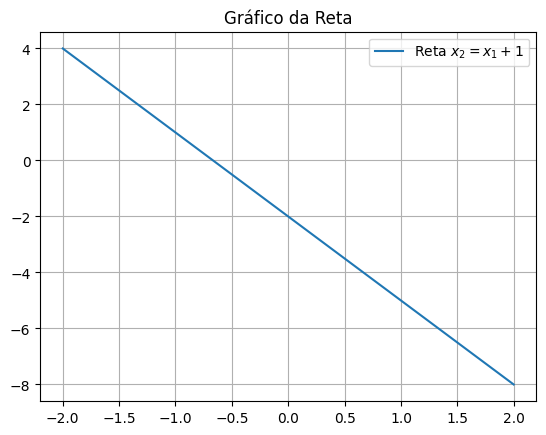

In [ ]:
eixo_x = np.linspace(-2, 2, num = 1000)
eixo_y = -3*eixo_x - 2

plt.plot(eixo_x, eixo_y, label = 'Reta $x_2 = x_1 + 1$')
plt.title('Gráfico da Reta')
plt.legend()
plt.grid()
plt.show()

* Os pontos acima da reta satisfaz: $ w^{T}X + b > 0.5 $
* Os pontos na reta satisfaz: $ w^{T}X + b = 0.5 $
* Os pontos abaixo da reta satisfaz: $ w^{T}X + b < 0.5 $


## Questão 3

In [ ]:

from google.colab import drive
drive.mount("/content/drive", force_remount = True)

import sys
sys.path.append('drive/My Drive/Colab Notebooks/Redes_neurais/Tutoriais_PyTorch/')

mnist_train = np.genfromtxt("drive/My Drive/Colab Notebooks/Redes_neurais/Tutoriais_PyTorch/mnist_train.csv", delimiter=",", encoding="utf8")
mnist_test = np.genfromtxt("drive/My Drive/Colab Notebooks/Redes_neurais/Tutoriais_PyTorch/mnist_test.csv", delimiter=",", encoding="utf8")

Mounted at /content/drive


In [ ]:
np.shape(mnist_train)

(60000, 785)

In [ ]:
#test_data = mnist_train.values()

x_train = mnist_train[:, 1:]
y_train = mnist_train[:, 0]

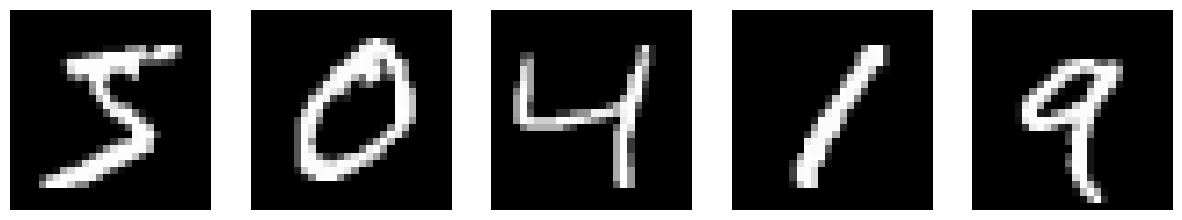

In [ ]:
# Plotar as primeiras imagens do conjunto de teste
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()

In [ ]:
# Carregar dados de treino (ajuste o nome do arquivo se necessário)
#train_data = pd.read_csv("mnist_train.csv", header=None).values

# Dividir os dados em treino e validação
x_train = mnist_train[:55000, 1:]
y_train = mnist_train[:55000, 0]
x_valid = mnist_train[55000:60000, 1:]
y_valid = mnist_train[55000:60000, 0]

In [ ]:
#Encontrando o maior valor na matriz x_train

m_valores = []

for linha in x_train:
  max = 0
  for elemento in linha:
    if elemento > max:
      m_valores.append(elemento)

np.max(m_valores)

255.0

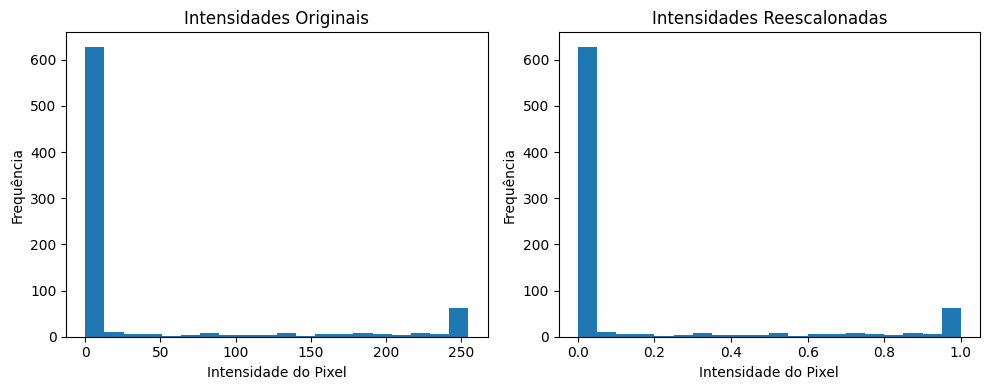

In [ ]:
# Histograma das intensidades originais da primeira imagem
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(x_train[0], bins=20)
plt.title("Intensidades Originais")
plt.xlabel("Intensidade do Pixel")
plt.ylabel("Frequência")

# Reescalonar as intensidades para o intervalo [0, 1]
# preservando as ocorrências de 0
x_train_rescaled = x_train / np.max(m_valores)
x_valid_rescaled = x_valid / np.max(m_valores)

# Histograma das intensidades reescalonadas da primeira imagem
plt.subplot(1, 2, 2)
plt.hist(x_train_rescaled[0], bins=20)
plt.title("Intensidades Reescalonadas")
plt.xlabel("Intensidade do Pixel")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

In [ ]:
np.shape(x_train) # Tamanho da imagem

(55000, 784)

In [ ]:
## Torch Tensor
x_train_load = torch.tensor(x_train_rescaled, dtype=torch.float32)
y_train_load = torch.tensor(y_train, dtype=torch.long)
x_valid_load = torch.tensor(x_valid_rescaled, dtype=torch.float32)
y_valid_load = torch.tensor(y_valid, dtype=torch.long)

## Criação de datasets e dataloads
batch_size = 16

## Train Loader
train_dataset = TensorDataset(x_train_load, y_train_load)
train_loader = DataLoader(train_dataset, batch_size = batch_size)

In [ ]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.linear = nn.Linear(in_features = 28*28, out_features = 10)

    def forward(self, x):
        return self.linear(x)

def get_accuracy(preds, labels):
    return torch.mean( preds.argmax(dim=1).eq(labels).float() )

model = net()

In [ ]:
lr_rates = [2, 1, 0.1, 0.01]
accuracies =  {lr: [] for lr in lr_rates}

for lr in lr_rates:
  print(" ")
  print("Learning Rate", lr)
  print(" ")
  opt = torch.optim.SGD(model.parameters(), lr= lr)

  for epoch in range(50):
    total_loss = 0

    for data_batch in train_loader:
      x_batch, y_batch = data_batch

      y_hat_batch = model(x_batch)
      loss = F.cross_entropy(y_hat_batch, y_batch.type(torch.LongTensor) )

      opt.zero_grad()
      loss.backward() # Calculando os gradientes
      opt.step() # Atualizando os pesos

      total_loss += loss.item()

    # Calculando acurácia no dataset valido
    y_hat_valid = model(x_valid_load)
    valid_accuracy = get_accuracy(y_hat_valid, y_valid_load)

    accuracies[lr].append(valid_accuracy)

    print(
      "epoch:", epoch+1,
      "validation accuracy:", round( valid_accuracy.item(), 4),
      "Total Loss:", round(total_loss, 4)
      )

 
Learning Rate 2
 
epoch: 1 validation accuracy: 0.8854 Total Loss: 4861.4156
epoch: 2 validation accuracy: 0.8406 Total Loss: 4157.4769
epoch: 3 validation accuracy: 0.8558 Total Loss: 4073.4099
epoch: 4 validation accuracy: 0.8626 Total Loss: 3988.8501
epoch: 5 validation accuracy: 0.8094 Total Loss: 3888.6557
epoch: 6 validation accuracy: 0.8774 Total Loss: 3813.8634
epoch: 7 validation accuracy: 0.8734 Total Loss: 3807.7705
epoch: 8 validation accuracy: 0.868 Total Loss: 3792.1921
epoch: 9 validation accuracy: 0.889 Total Loss: 3790.4196
epoch: 10 validation accuracy: 0.862 Total Loss: 3729.8155
epoch: 11 validation accuracy: 0.8786 Total Loss: 3748.3629
epoch: 12 validation accuracy: 0.8602 Total Loss: 3752.1356
epoch: 13 validation accuracy: 0.8824 Total Loss: 3727.3803
epoch: 14 validation accuracy: 0.8982 Total Loss: 3689.0826
epoch: 15 validation accuracy: 0.8852 Total Loss: 3689.8114
epoch: 16 validation accuracy: 0.8846 Total Loss: 3671.2404
epoch: 17 validation accuracy: 0

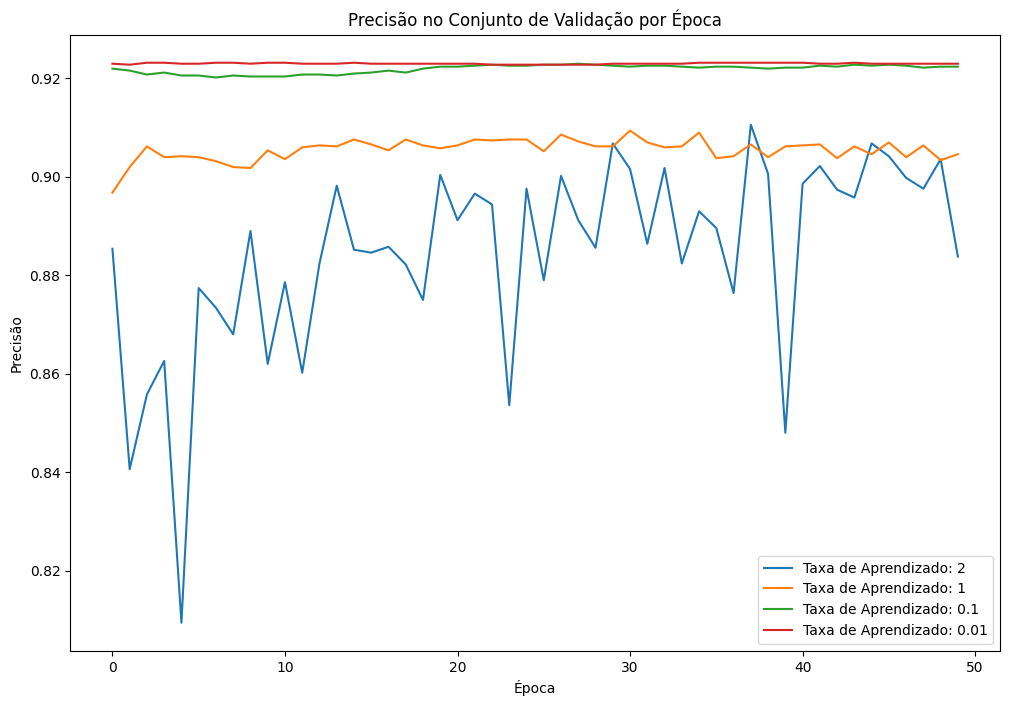

In [ ]:
# Plotar as precisões durante o treinamento
plt.figure(figsize=(12, 8))
for lr, accs in accuracies.items():
    plt.plot(accs, label=f"Taxa de Aprendizado: {lr}")
plt.title("Precisão no Conjunto de Validação por Época")
plt.xlabel("Época")
plt.ylabel("Precisão")
plt.legend()
plt.show()

In [ ]:
def find_best_parameter(dic):
    best_param = None
    big_value = float('-inf')

    for param, values in dic.items():
        max_value = np.max(values)
        if max_value > big_value:
            big_value = max_value
            melhor_parametro = param

    return melhor_parametro, big_value

# Chamando a função e imprimindo o resultado
best_lr, accur = find_best_parameter(accuracies)
print(f"O melhor parâmetro é: {best_lr} com acurácia de {accur*100:.2f}%")

O melhor parâmetro é: 0.01 com acurácia de 92.32%


Como podemos ver pelo gráfico: $ \gamma = 0.1$ é o melhor valor para a taxa de aprendizado

In [ ]:
# Definir modelos MLP com diferentes números de camadas
class MLP_1(nn.Module):
    def __init__(self):
        super(MLP_1, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class MLP_2(nn.Module):
    def __init__(self):
        super(MLP_2, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class MLP_3(nn.Module):
    def __init__(self):
        super(MLP_3, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Modelo de regressão multinomial logística
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        return self.linear(x)

In [ ]:
models = [MLP_1(), MLP_2(), MLP_3(), LogisticRegression()]
accuracies_2 = {model: [] for model in models}
names = {models[0]: "MLP_1", models[1]: "MLP_2", models[2]: "MLP_3", models[3]:"LogisticRegression"}

# Salvando as probabilidades de predição no conjunto de validação
val_predictions = []
val_labels = []


for model in models:
  print(" ")
  print("Model", f"{names[model]}")
  print(" ")
  opt = torch.optim.SGD(model.parameters(), lr= 0.01)

  for epoch in range(100):
    total_loss = 0

    for data_batch in train_loader:
      x_batch, y_batch = data_batch

      y_hat_batch = model(x_batch)
      loss = F.cross_entropy(y_hat_batch, y_batch.type(torch.LongTensor) )

      opt.zero_grad()
      loss.backward() # Calculando os gradientes
      opt.step() # Atualizando os pesos

      total_loss += loss.item()

    # Calculando acurácia no dataset valido
    y_hat_valid = model(x_valid_load)
    valid_accuracy = get_accuracy(y_hat_valid, y_valid_load)

    accuracies_2[model].append(valid_accuracy)

    if len(val_predictions) < len(models):
      val_predictions.append(y_hat_valid)
      val_labels.append(y_valid_load)

    else:
      val_predictions[models.index(model)] += y_hat_valid

    print(
      "epoch:", epoch+1,
      "validation accuracy:", round( valid_accuracy.item(), 4),
      "Total Loss:", round(total_loss, 4)
      )

 
Model MLP_1
 
epoch: 1 validation accuracy: 0.9264 Total Loss: 2264.5002
epoch: 2 validation accuracy: 0.9406 Total Loss: 1080.5411
epoch: 3 validation accuracy: 0.948 Total Loss: 904.5412
epoch: 4 validation accuracy: 0.9542 Total Loss: 786.2628
epoch: 5 validation accuracy: 0.9592 Total Loss: 695.9706
epoch: 6 validation accuracy: 0.9628 Total Loss: 624.5655
epoch: 7 validation accuracy: 0.9654 Total Loss: 566.4242
epoch: 8 validation accuracy: 0.967 Total Loss: 517.7539
epoch: 9 validation accuracy: 0.9682 Total Loss: 476.4564
epoch: 10 validation accuracy: 0.9694 Total Loss: 441.0838
epoch: 11 validation accuracy: 0.9708 Total Loss: 410.5365
epoch: 12 validation accuracy: 0.9726 Total Loss: 383.6902
epoch: 13 validation accuracy: 0.9744 Total Loss: 360.0756
epoch: 14 validation accuracy: 0.9752 Total Loss: 339.0603
epoch: 15 validation accuracy: 0.9754 Total Loss: 320.1452
epoch: 16 validation accuracy: 0.9764 Total Loss: 303.0378
epoch: 17 validation accuracy: 0.977 Total Loss: 

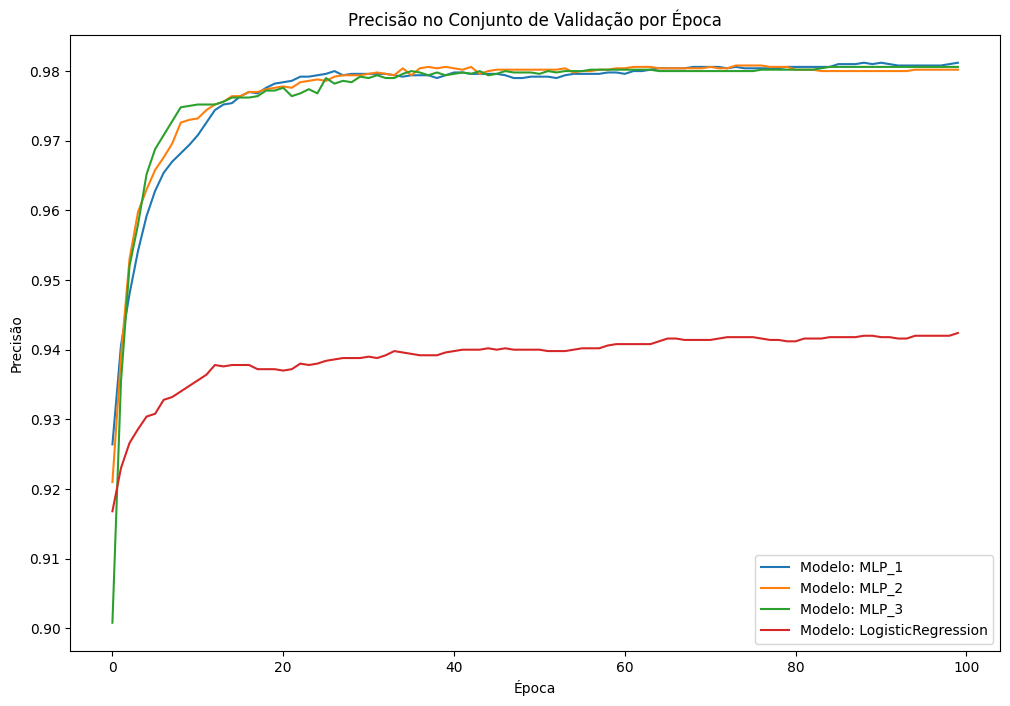

In [ ]:
# Plotar as precisões durante o treinamento
plt.figure(figsize=(12, 8))
for model, accs in accuracies_2.items():
    plt.plot(accs, label=f"Modelo: {names[model]}")
plt.title("Precisão no Conjunto de Validação por Época")
plt.xlabel("Época")
plt.ylabel("Precisão")
plt.legend()
plt.show()